In [2]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_severe = [
    "c:\\Users\\anany\\Downloads\\00000066-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[007].edf"
]

edf_files_normal = [
    "C:\\Users\\anany\\Downloads\\00000064-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[009].edf"
]

edf_files_moderate = [
    "C:\\Users\\anany\\Downloads\\00000074-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[009].edf"
]

edf_files_mild = [
    "C:\\Users\\anany\\Downloads\\00000067-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[011].edf",
]

labels = signal_labels(edf_files_normal[0])
print(labels)
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
cv_dict = {}

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow Patient', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [3]:
import statistics as stats
def cv_of_combined(files_list, index):
    combined_sig = combined_signal(files_list, index)
    mean = combined_sig.mean()
    var = stats.variance(combined_sig)
    if mean == 0:
        return 'nil'
    return var/mean 

In [4]:
combined_cv_dict = {}

for i in range(32):
    if i in [22, 29, 31]:
        continue
    combined_cv_dict[labels[i]] = []
    cv_1 = cv_of_combined(edf_files_normal, i)
    cv_2 = cv_of_combined(edf_files_mild, i)
    cv_3 = cv_of_combined(edf_files_moderate, i)
    cv_4 = cv_of_combined(edf_files_severe, i)
    combined_cv_dict[labels[i]].append(cv_1)
    combined_cv_dict[labels[i]].append(cv_2)
    combined_cv_dict[labels[i]].append(cv_3)
    combined_cv_dict[labels[i]].append(cv_4)

print(combined_cv_dict)

KeyboardInterrupt: 

In [5]:
data = {
    'EEG F3-A2': [-253.2456659370727, -429.95730206635693, -245.5844515026625, -286.5679560317743],
    'EEG F4-A1': [-235.57180508568388, -250.11387939332073, -85.2456629717539, -101.7892132330167],
    'EEG A1-A2': [-305.79736004565586, -4605.228728873715, 10.143775120392409, 18.613528167580146],
    'EEG C3-A2': [-388.1869781255844, -322.93404963413417, -187.00046827470115, -197.74173426820056],
    'EEG C4-A1': [612.2090640921739, 253.10932785470774, 103.00395802783704, 164.8625269229159],
    'EEG O1-A2': [18.34274055970779, 3.6209745700780056, 10.987103349449619, 3.150187242093362],
    'EEG O2-A1': [16.173486106087662, 2.9499273816930334, 7.457077352502101, 1.6461544230818939],
    'EOG LOC-A2': [301.9158644213466, 169.4972033781382, 85.30940271695384, 149.31689755469534],
    'EOG ROC-A2': [-437.34080329993884, -549.2068514780175, -231.4331207825705, -321.8409657487256],
    'EMG Chin': [-185.83890469371173, -754.8838479820356, -509.4006908661375, -2850.737869400411],
    'Leg 1': [-86.45332602859074, -241.84125048730152, -183.83972458314224, -301.6147044506913],
    'Leg 2': [-85.0544380479712, -261.7262346654488, -252.82155604429337, -266.76949754337323],
    'ECG I': [-7559.836272771563, -1109.9645053893696, -362.84822387317126, -747.2250185378335],
    'RR': [10.275612939278869, 7.772567707989798, 7.247717886549033, 7.391017698470629],
    'ECG II': [-10815.850794677674, -2804.9890723426997, -1843.305835830641, -3132.166465341073],
    'Snore': [-98.34158155196367, -62.69139365510453, -77.86976004667324, -1200.4212266121613],
    'Flow patient 1': [-206.38448632074727, 147586.73213735086, 9325.518231854161, -926.805901405052],
    'Flow patient 2': [-524.6835055634434, 9317.109882563507, -7125.174608843117, 405.6312411041957],
    'Effort THO': [-128.17965962553032, -581.1165554939944, -499.20516620375446, -1715.6841185002995],
    'Effort ABD': [-116.00866781499953, -1249.9126334869948, -5982.731078969046, -2975.556067403955],
    'SpO2': [1.0439442423303211, 1.7303030697050692, 0.04375749442313852, 2.7270251701560677],
    'Pleth': [-160.84289825751844, -110037.9204161773, -45826.86767367622, -97432.62827682006],
    'Flow patient 3': [-3275.4350149662455, -6975.830057497984, -3279.479030317753, 2560.105552090156],   
    'xPAP CPAP': [0, 4.804300669692294, 3.446093137426892, 10.376277538186075],
    'xPAP IPAP': [0, 4.804300669692294, 3.446093137426892, 10.376277538186075],
    'xPAP EPAP': [0, 4.804300669692294, 3.446093137426892, 6.576235558750487],
    'Leak Total': [-3275.4350149662455, 23.11371705109966, 16.107849933585616, 35.58303148839347],
    'PulseRate': [1.010903812014659, 1.6939747123899815, 0.9935717823030203, 2.377560344623727],
    'ECG IIHF': [-10726.560909576814, -3182.2614230499207, -2007.4139698616723, -3284.297433539136]
}

In [6]:
# using abs values
channel_variability = {}

for channel, vmr_values in data.items():
    abs_vmr_values = [abs(value) for value in vmr_values]
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    channel_variability[channel] = variability

sorted_channels = sorted(channel_variability, key=channel_variability.get, reverse=True)

top_10_channels = sorted_channels[:10]
print(sorted_channels)
print(channel_variability['Snore'])
print("Top 10 channels based on variability:")
for channel in top_10_channels:
    print(f"{channel}: {channel_variability[channel]}")

print(channel_variability)
    

['Flow patient 1', 'Pleth', 'ECG II', 'Flow patient 2', 'ECG IIHF', 'ECG I', 'Effort ABD', 'EEG A1-A2', 'Flow patient 3', 'Leak Total', 'EMG Chin', 'Effort THO', 'Snore', 'EEG C4-A1', 'EOG ROC-A2', 'EOG LOC-A2', 'Leg 1', 'EEG C3-A2', 'EEG F3-A2', 'Leg 2', 'EEG F4-A1', 'EEG O1-A2', 'EEG O2-A1', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'RR', 'SpO2', 'PulseRate']
1137.7298329570567
Top 10 channels based on variability:
Flow patient 1: 147380.3476510301
Pleth: 109877.07751791978
ECG II: 8972.544958847033
Flow patient 2: 8911.47864145931
ECG IIHF: 8719.146939715141
ECG I: 7196.988048898392
Effort ABD: 5866.722411154047
EEG A1-A2: 4595.084953753323
Flow patient 3: 4415.7245054078285
Leak Total: 3259.3271650326597
{'EEG F3-A2': 184.37285056369444, 'EEG F4-A1': 164.86821642156684, 'EEG A1-A2': 4595.084953753323, 'EEG C3-A2': 201.18650985088325, 'EEG C4-A1': 509.20510606433686, 'EEG O1-A2': 15.192553317614426, 'EEG O2-A1': 14.527331683005768, 'EOG LOC-A2': 216.60646170439276, 'EOG ROC-A2': 317.77

In [53]:
channel_variability = {}

for channel, vmr_values in data.items():
    variability = max(vmr_values) - min(vmr_values)
    channel_variability[channel] = variability

sorted_channels = sorted(channel_variability, key=channel_variability.get, reverse=True)

top_10_channels = sorted_channels[:10]
print(sorted_channels)
print(channel_variability['Snore'])
print("Top 10 channels based on variability:")
for channel in top_10_channels:
    print(f"{channel}: {channel_variability[channel]}")
    

['Flow patient 1', 'Pleth', 'Flow patient 2', 'Flow patient 3', 'ECG II', 'ECG IIHF', 'ECG I', 'Effort ABD', 'EEG A1-A2', 'Leak Total', 'EMG Chin', 'Effort THO', 'Snore', 'EEG C4-A1', 'EOG ROC-A2', 'EOG LOC-A2', 'Leg 1', 'EEG C3-A2', 'EEG F3-A2', 'Leg 2', 'EEG F4-A1', 'EEG O1-A2', 'EEG O2-A1', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'RR', 'SpO2', 'PulseRate']
1137.7298329570567
Top 10 channels based on variability:
Flow patient 1: 148513.5380387559
Pleth: 109877.07751791978
Flow patient 2: 16442.284491406623
Flow patient 3: 9535.93560958814
ECG II: 8972.544958847033
ECG IIHF: 8719.146939715141
ECG I: 7196.988048898392
Effort ABD: 5866.722411154047
EEG A1-A2: 4623.842257041295
Leak Total: 3311.018046454639


In [33]:
def find_cv(channel):
    mean = channel.mean()
    var = stats.variance(channel)
    if mean == 0:
        return 'nil'
    return var/mean

In [54]:
#Flow Patient 1
index = labels.index('Flow patient 1')
fp1_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    fp1_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(fp1_dict) 

fp1_hour_variability = {}

for hour, vmr_values in fp1_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    fp1_hour_variability[hour] = variability

sorted_hours = sorted(fp1_hour_variability, key=fp1_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {fp1_hour_variability[hour]}")

{'HOUR 1': [31228.70418030184, -12490.56079183101, 21311.055576168827, -973.0329990205892], 'HOUR 2': [64459.04570550243, 54364.964728503044, 12445.953258614847, 2089.9291105846505], 'HOUR 3': [48990.458159148504, -53480.64836342596, 52251.02146979259, -539.6786620320773], 'HOUR 4': [19849.749634829284, 38841.07696458443, 11035.051712892946, 100.04966131659694], 'HOUR 5': [121162.31460504464, 57397.16914325044, 548.9499768548212, 76.05179067808146], 'HOUR 6': [-202074.76232354998, -1341257.7569124624, 1312.3567803173198, 55.80094334481902], 'HOUR 7': [-102.02150549536232, 62575.91489256782, 436.49198981781603, 47.59325155788175], 'HOUR 8': [218247.16032275336, 15.628681711208518, 64.62145709342668, 0], 'HOUR 9': [-3950.791511018675, 16.560452376679788, 961.7340898193299, 0], 'HOUR 10': [0, 11.931605495942991, 0, 0], 'HOUR 11': [0, 78.5489856564479, 0, 0]}
Decreasing order of variability of hours:
HOUR 6: 1341201.9559691176
HOUR 8: 218247.16032275336
HOUR 5: 121086.26281436655
HOUR 7: 6

In [55]:
#Pleth 
index = labels.index('Pleth')
pleth_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    pleth_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(pleth_dict)

pleth_hour_variability = {}

for hour, vmr_values in pleth_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    pleth_hour_variability[hour] = variability

sorted_hours = sorted(pleth_hour_variability, key=pleth_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {pleth_hour_variability[hour]}")


{'HOUR 1': [-180069.7159656008, -150207.0218839973, 639674.1802681095, 351478.16333138867], 'HOUR 2': [-93858.93866256208, 751603.072541741, -150499.30817696132, -63271.96903106379], 'HOUR 3': [-27133.16797097208, -250894.03643250663, -60151.73122749657, -65307.25157457084], 'HOUR 4': [-30857.744166797376, -719247.9900218805, -23524.380174020745, -42711.489369282004], 'HOUR 5': [-26595.991748081942, -69455.86118958356, -21343.15362988155, -114368.24660805875], 'HOUR 6': [-104220.19173354008, -177018.5791849886, -61341.69166790147, -56567.464654837146], 'HOUR 7': [-97.85119487862082, -48710.48117406669, -24207.834355457824, -16015.677658584314], 'HOUR 8': [-59868.5551656471, -343055.86854550213, -15503.982285764554, 0], 'HOUR 9': [-68608.24250743033, -119724.65935272086, -24660.185942185275, 0], 'HOUR 10': [0, -42032.252069988775, 0, 0], 'HOUR 11': [0, -7385.297425177012, 0, 0]}
Decreasing order of variability of hours:
HOUR 4: 695723.6098478597
HOUR 2: 688331.1035106771
HOUR 1: 489467.

In [56]:
#ECG II 
index = labels.index('ECG II')
ecg_2_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    ecg_2_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(ecg_2_dict)

ecg_2_hour_variability = {}

for hour, vmr_values in ecg_2_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    ecg_2_hour_variability[hour] = variability

sorted_hours = sorted(ecg_2_hour_variability, key=ecg_2_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {ecg_2_hour_variability[hour]}")


{'HOUR 1': [-18770.860908684474, -3856.592070813441, -2396.079004702587, -2051.402061716842], 'HOUR 2': [-41634.98255754071, -7403.176412355496, -2087.5319971106096, -6224.922353681054], 'HOUR 3': [-20860.965754095425, -2534.646636522632, -1526.8365059625974, -3461.7717912414555], 'HOUR 4': [-31701.384632016812, -3050.9750914015217, -1743.9658364553002, -5196.52327411379], 'HOUR 5': [-7960.804620176922, -2031.419029045072, -1630.777696088471, -1939.6329615813456], 'HOUR 6': [-11056.822497858826, -2160.953455539509, -1606.2431966600757, -1872.5654738337496], 'HOUR 7': [-7683.753401328473, -2494.5692766192506, -2343.3642943410723, -1976.9322933069352], 'HOUR 8': [-9321.78067216306, -2837.341666268834, -1691.1028053857049, 0], 'HOUR 9': [-10973.900989606249, -1417.1792739666635, -1516.9278819299248, 0], 'HOUR 10': [0, -2187.364682077047, 0, 0], 'HOUR 11': [0, -1363.8471520274297, 0, 0]}
Decreasing order of variability of hours:
HOUR 2: 39547.4505604301
HOUR 4: 29957.418795561513
HOUR 3: 1

In [57]:
#Flow Patient 2
index = labels.index('Flow patient 2')
fp2_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    fp2_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(fp2_dict)

fp2_hour_variability = {}

for hour, vmr_values in fp2_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    fp2_hour_variability[hour] = variability

sorted_hours = sorted(fp2_hour_variability, key=fp2_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {fp2_hour_variability[hour]}")


{'HOUR 1': [-23706.656189829242, -13799.181808204723, -15167.370042160426, -971.4717383618615], 'HOUR 2': [-9081.709121860964, -33742.43082149275, -47776.16521442331, -623.3296095448493], 'HOUR 3': [-6615.877417740347, -7390.561228894838, -4703.683514969167, 1824.3640066842156], 'HOUR 4': [-43154.22399956751, -11324.949843793403, -2770.903568845336, 3144.8105914923635], 'HOUR 5': [-15604.298141425925, 217340.21001231435, -12.65457786574171, 229.28865185187524], 'HOUR 6': [-15571.02098215365, 8136.320247083741, -15.652808792537021, 204.5599465189851], 'HOUR 7': [-122.0047318405582, -575642.8978039871, -10.172541399547201, 631.0675536410328], 'HOUR 8': [-16963.313815330996, 2141.459546148075, -13.572766226641503, 0], 'HOUR 9': [-12261.508941668351, 7134.931033155951, -20.85270780843819, 0], 'HOUR 10': [0, 4440.226084678143, 0, 0], 'HOUR 11': [0, -14047.214823985283, 0, 0]}
Decreasing order of variability of hours:
HOUR 7: 575632.7252625875
HOUR 5: 217327.55543444862
HOUR 2: 47152.8356048

In [68]:
#ECGG IIHF 
index = labels.index('ECG IIHF')
ecg_iihf_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    ecg_iihf_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]
print(ecg_iihf_dict)

ecg_iihf_hour_variability = {}

for hour, vmr_values in ecg_iihf_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    ecg_iihf_hour_variability[hour] = variability

sorted_hours = sorted(ecg_iihf_hour_variability, key=ecg_iihf_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {ecg_iihf_hour_variability[hour]}")


{'HOUR 1': [-18640.364482402776, -6587.861376605328, -2703.822381858051, -2194.4709078544615], 'HOUR 2': [-41878.93029603081, -7586.5845286598915, -2157.470413798123, -6186.386715866476], 'HOUR 3': [-20744.602803018803, -2567.2138084416288, -1773.4330702149218, -3987.1442483802707], 'HOUR 4': [-31748.011051212066, -3175.9618442556, -1923.4565671100922, -5187.912474088164], 'HOUR 5': [-8426.530093353398, -1980.2100255766156, -1808.9565878831797, -2108.344877387889], 'HOUR 6': [-11572.987600609476, -2141.748308195763, -1771.3079810487184, -2025.855537848369], 'HOUR 7': [-7698.297602407918, -2503.4622237362614, -2485.2261529099555, -2110.9615572302578], 'HOUR 8': [-9691.23017572184, -2836.0780873108965, -1769.1109776095536, 0], 'HOUR 9': [-11040.542019523591, -1420.2342476562465, -1581.877429005376, 0], 'HOUR 10': [0, -2183.0700301661514, 0, 0], 'HOUR 11': [0, -1399.907936402582, 0, 0]}
Decreasing order of variability of hours:
HOUR 2: 39721.45988223269
HOUR 4: 29824.554484101973
HOUR 3: 

In [63]:
#ECG I
index = labels.index('ECG I')
ecg_1_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    ecg_1_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(ecg_1_dict)

ecg_1_hour_variability = {}

for hour, vmr_values in ecg_1_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    ecg_1_hour_variability[hour] = variability

sorted_hours = sorted(ecg_1_hour_variability, key=ecg_1_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {ecg_1_hour_variability[hour]}")


{'HOUR 1': [-9430.880272688883, -1933.6101849654233, -861.3354890568393, -628.794187856484], 'HOUR 2': [-14604.306804172405, -2792.190981621867, -378.18924763427697, -1560.9211797217965], 'HOUR 3': [-9306.22453226914, -1003.6594081827515, -137.80530246036835, -1182.8348850775917], 'HOUR 4': [-10728.852568536766, -1071.8652002427807, -205.26856870191185, -1623.1851209027718], 'HOUR 5': [-1276.9772471275976, -1273.3892061942543, -139.97388284660735, -58.77764001261795], 'HOUR 6': [-1625.1334023623187, -500.6369423310512, -71.36008585427264, -94.44579186641762], 'HOUR 7': [-7251.548435749185, -1053.0144695652584, -660.7800786742027, -136.7412084690443], 'HOUR 8': [-1489.1209367588901, -794.7903738325643, -86.11446586733715, 0], 'HOUR 9': [-2208.886139974909, -419.0329894348926, -82.42791232436723, 0], 'HOUR 10': [0, -650.7256144757154, 0, 0], 'HOUR 11': [0, -249.39792701682634, 0, 0]}
Decreasing order of variability of hours:
HOUR 2: 14226.117556538129
HOUR 4: 10523.583999834855
HOUR 3: 9

In [64]:
#Effort ABD 
index = labels.index('Effort ABD')
effort_abd_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    effort_abd_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(effort_abd_dict)

effort_abd_hour_variability = {}

for hour, vmr_values in effort_abd_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    effort_abd_hour_variability[hour] = variability

sorted_hours = sorted(effort_abd_hour_variability, key=effort_abd_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {effort_abd_hour_variability[hour]}")


{'HOUR 1': [-2572.2822520542595, -291.6056489704148, -14195.536726220118, 1252.3377775975173], 'HOUR 2': [-2023.3932270143248, -3750.7122933786295, 142388.14743843712, -4140.727048190594], 'HOUR 3': [-626.5895811372594, -773.1658048843811, -3773.089157526458, -3204.126615375968], 'HOUR 4': [-3699.342735661064, -7463.429328442467, -5886.475609734003, -1866.659233179611], 'HOUR 5': [-2230.6790126703613, -4378.457817333926, -4393.127388701853, -316.115750136127], 'HOUR 6': [-1154.729558262282, -1990.8291086853478, -5020.89715796669, -640.5436494396638], 'HOUR 7': [-92.85402719304318, -6856.839104243825, -4283.269672225642, -230.6943316912202], 'HOUR 8': [-574.0164618811604, -4395.903415102646, -3375.065675696372, 0], 'HOUR 9': [-1071.568094912074, -2200.405140611958, -1762.069802081195, 0], 'HOUR 10': [0, -4393.759141630836, 0, 0], 'HOUR 11': [0, -3810.8396959660026, 0, 0]}
Decreasing order of variability of hours:
HOUR 2: 140364.7542114228
HOUR 1: 13903.931077249703
HOUR 7: 6763.98507705

In [65]:
#EEG A1-A2
index = labels.index('EEG A1-A2')
eeg_a1a2_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    eeg_a1a2_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(eeg_a1a2_dict)

eeg_a1a2_hour_variability = {}

for hour, vmr_values in eeg_a1a2_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    eeg_a1a2_hour_variability[hour] = variability

sorted_hours = sorted(eeg_a1a2_hour_variability, key=eeg_a1a2_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {eeg_a1a2_hour_variability[hour]}")


{'HOUR 1': [21.58683065735123, 55507.569216533266, 3.5330097495190973, 15.378690312806658], 'HOUR 2': [-13.510260785865011, 12.6971602877917, 8.041384737290873, -41.02416103269314], 'HOUR 3': [-14.342431787341658, 5.216892196942061, 30.214103973631374, 34.86980409079607], 'HOUR 4': [-26.253328709596953, 2721.878126789076, 20.03229334450862, 31.657455660540812], 'HOUR 5': [-16.35129069546503, -7.0827289348680145, 17.20178585474941, 14.058991549124004], 'HOUR 6': [-21.747274306080268, -8.759106457028553, 15.13188428030828, 9.76142786725821], 'HOUR 7': [-284.8046644479246, -11.979641215043552, 13.968801416393738, 10.279338014132028], 'HOUR 8': [-12.649652335072272, -8.656231413100096, 9.95971752269779, 0], 'HOUR 9': [-31.899114917113575, -10.833104055665705, 9.742181730124022, 0], 'HOUR 10': [0, -17.696271228770208, 0, 0], 'HOUR 11': [0, -189.14891752164442, 0, 0]}
Decreasing order of variability of hours:
HOUR 1: 55504.03620678375
HOUR 4: 2701.8458334445672
HOUR 7: 274.5253264337926
HOUR

In [66]:
#Flow patient 3 
index = labels.index('Flow patient 3')
fp3_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    fp3_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(fp3_dict)

fp3_hour_variability = {}

for hour, vmr_values in fp3_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    fp3_hour_variability[hour] = variability

sorted_hours = sorted(fp3_hour_variability, key=fp3_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {fp3_hour_variability[hour]}")

{'HOUR 1': [-0.0, -0.0, -0.0, -0.0], 'HOUR 2': [-0.0, -0.0, -0.0, -0.0], 'HOUR 3': [-0.0, -0.0, -0.0, -0.0], 'HOUR 4': [-0.0, -0.0, -437.689289131188, 841.6267837403918], 'HOUR 5': [-0.0, -0.0, 7759.928749080522, -4207.361932468936], 'HOUR 6': [-0.0, -0.0, 26109.77696000944, -2709.8833150819414], 'HOUR 7': [-3265.0578071612103, -1165.667589597012, -7834.893629868787, -19558.199159799846], 'HOUR 8': [-0.0, -20055.22788002061, -8421.700601787128, 0], 'HOUR 9': [-0.0, -12153.555912091819, 25531.901379845942, 0], 'HOUR 10': [0, -6965.329039168145, 0, 0], 'HOUR 11': [0, -3277.4069705414413, 0, 0]}
Decreasing order of variability of hours:
HOUR 6: 26109.77696000944
HOUR 9: 25531.901379845942
HOUR 8: 20055.22788002061
HOUR 7: 18392.531570202835
HOUR 5: 7759.928749080522
HOUR 10: 6965.329039168145
HOUR 11: 3277.4069705414413
HOUR 4: 841.6267837403918
HOUR 1: 0.0
HOUR 2: 0.0
HOUR 3: 0.0


In [67]:
#Leak Total 
index = labels.index('Leak Total')
leak_dict = {}
for i in range(11):
    if i >= 9:
        cv1 = 0
        cv3 = 0
    else:
        cv1 = find_cv(read_file_signal(edf_files_normal[i], index))
        cv3 = find_cv(read_file_signal(edf_files_moderate[i], index))
    cv2 = find_cv(read_file_signal(edf_files_mild[i], index))
    if i >= 7:
        cv4 = 0
    else:
        cv4 = find_cv(read_file_signal(edf_files_severe[i], index))
    leak_dict[f"HOUR {i+1}"] = [cv1, cv2, cv3, cv4]

print(leak_dict)

leak_hour_variability = {}

for hour, vmr_values in leak_dict.items():
    abs_vmr_values = [abs(value) for value in vmr_values]   
    variability = max(abs_vmr_values) - min(abs_vmr_values)
    leak_hour_variability[hour] = variability

sorted_hours = sorted(leak_hour_variability, key=leak_hour_variability.get, reverse=True)

print("Decreasing order of variability of hours:")
for hour in sorted_hours:
    print(f"{hour}: {leak_hour_variability[hour]}")


{'HOUR 1': [-0.0, -0.0, -0.0, -0.0], 'HOUR 2': [-0.0, -0.0, -0.0, -0.0], 'HOUR 3': [-0.0, -0.0, -0.0, -0.0], 'HOUR 4': [-0.0, -0.0, 17.26883170983702, 10.414547019316485], 'HOUR 5': [-0.0, -0.0, 0.18835539226139333, 1.0425685186908062], 'HOUR 6': [-0.0, -0.0, 0.06309400771324276, 1.25483359388669], 'HOUR 7': [-3265.0578071612103, 33.21295127699279, 0.9942023231888665, 1.4865643481394595], 'HOUR 8': [-0.0, 0.23203685301032126, 0.23369958141022243, 0], 'HOUR 9': [-0.0, 0.2181720482055552, 0.3439719667445349, 0], 'HOUR 10': [0, 0.07104007976522547, 0, 0], 'HOUR 11': [0, 0.16085924271406143, 0, 0]}
Decreasing order of variability of hours:
HOUR 7: 3264.0636048380215
HOUR 4: 17.26883170983702
HOUR 6: 1.25483359388669
HOUR 5: 1.0425685186908062
HOUR 9: 0.3439719667445349
HOUR 8: 0.23369958141022243
HOUR 11: 0.16085924271406143
HOUR 10: 0.07104007976522547
HOUR 1: 0.0
HOUR 2: 0.0
HOUR 3: 0.0


30968 309680


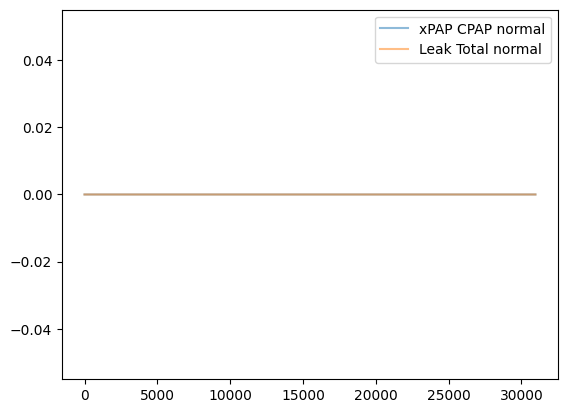

In [89]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Leak Total')
ch1 = combined_signal(edf_files_normal, index1)
ch2 = combined_signal(edf_files_normal, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2[resampled_ch2 != 0] = 0

plt.plot(resampled_ch1, label='xPAP CPAP normal', alpha=0.5)
plt.plot(resampled_ch2, label='Leak Total normal', alpha=0.5)
plt.legend()
plt.show()

36511 365110
correlation coefficient is 0.9927918945479709


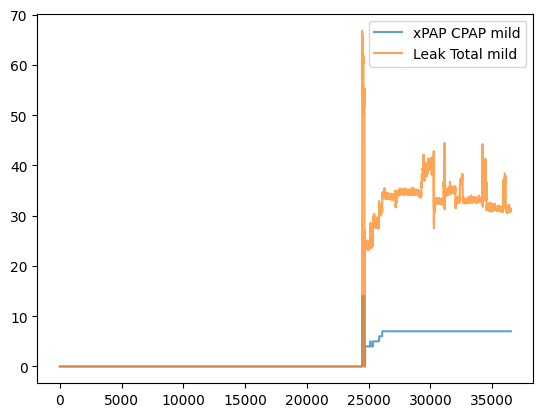

In [110]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Leak Total')
ch1 = combined_signal(edf_files_mild, index1)
ch2 = combined_signal(edf_files_mild, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP mild', alpha = 0.7)
plt.plot(resampled_ch2, label='Leak Total mild', alpha = 0.7)
plt.legend()
plt.show()

29798 297980
correlation coefficient is 0.9928226483875129


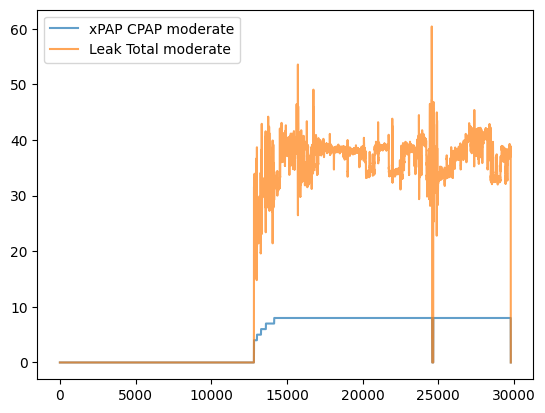

In [111]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Leak Total')
ch1 = combined_signal(edf_files_moderate, index1)
ch2 = combined_signal(edf_files_moderate, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP moderate', alpha = 0.7)
plt.plot(resampled_ch2, label='Leak Total moderate', alpha = 0.7)
plt.legend()
plt.show()

25200 252000
correlation coefficient is 0.9432247847184531


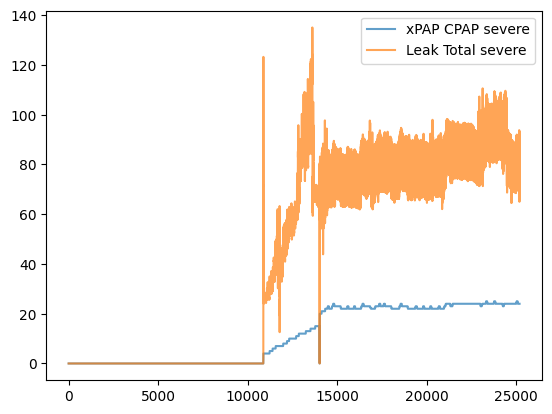

In [112]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Leak Total')
ch1 = combined_signal(edf_files_severe, index1)
ch2 = combined_signal(edf_files_severe, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP severe', alpha = 0.7)
plt.plot(resampled_ch2, label='Leak Total severe', alpha = 0.7)
plt.legend()
plt.show()

30968 3096800


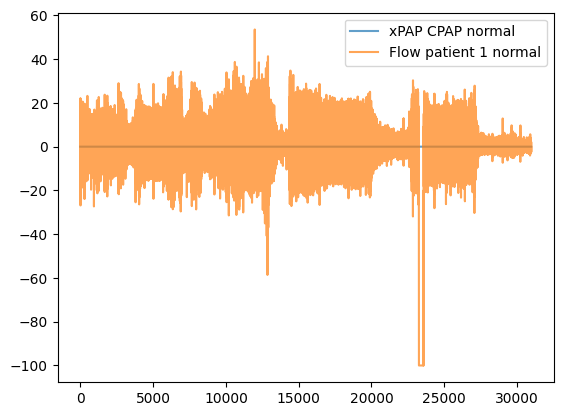

In [116]:
import pandas as pd

index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 1')
ch1 = combined_signal(edf_files_normal, index1)
ch2 = combined_signal(edf_files_normal, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

plt.plot(resampled_ch1, label='xPAP CPAP normal', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 1 normal', alpha = 0.7)
plt.legend()
plt.show()

36511 3651100
correlation coefficient is -0.00045616932827977086


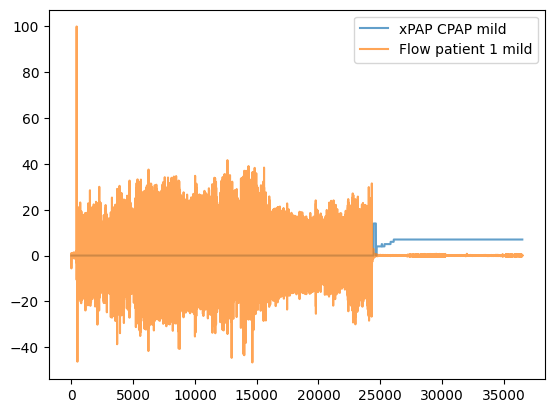

In [117]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 1')
ch1 = combined_signal(edf_files_mild, index1)
ch2 = combined_signal(edf_files_mild, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP mild', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 1 mild', alpha = 0.7)
plt.legend()
plt.show()

29798 2979800
correlation coefficient is -0.0001906404029711151


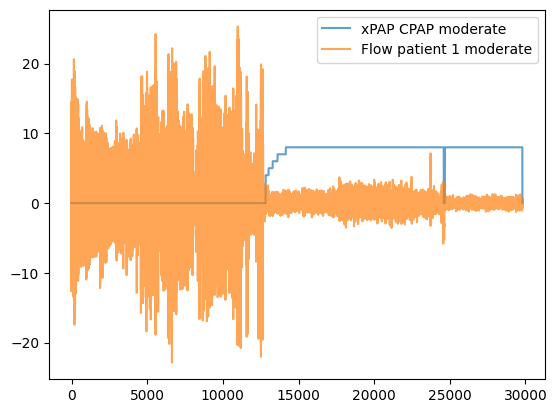

In [118]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 1')
ch1 = combined_signal(edf_files_moderate, index1)
ch2 = combined_signal(edf_files_moderate, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP moderate', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 1 moderate', alpha = 0.7)
plt.legend()
plt.show()

25200 2520000
correlation coefficient is 0.006968215313484819


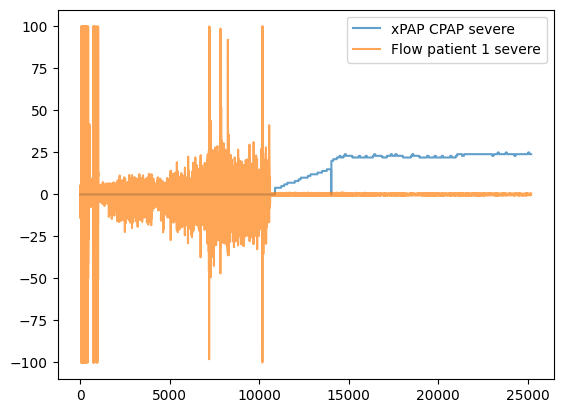

In [120]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 1')
ch1 = combined_signal(edf_files_severe, index1)
ch2 = combined_signal(edf_files_severe, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP severe', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 1 severe', alpha = 0.7)
plt.legend()
plt.show()

30968 309680


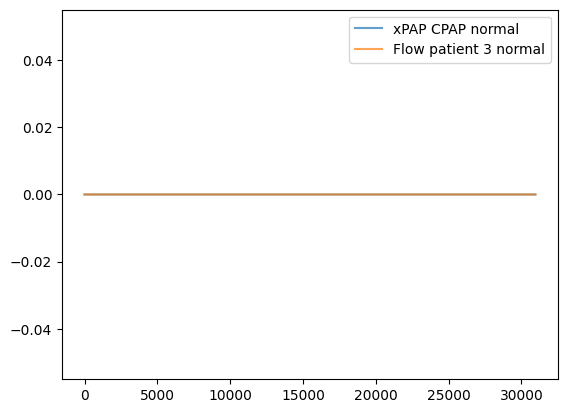

In [122]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 3')
ch1 = combined_signal(edf_files_normal, index1)
ch2 = combined_signal(edf_files_normal, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2[resampled_ch2 != 0] = 0

plt.plot(resampled_ch1, label='xPAP CPAP normal', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 3 normal', alpha = 0.7)
plt.legend()
plt.show()

36511 365110
correlation coefficient is -0.0010068741700958188


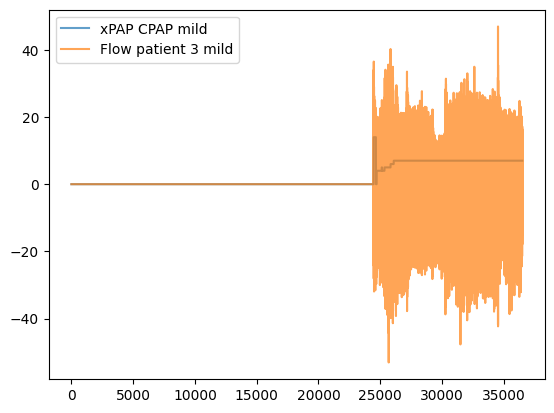

In [123]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 3')
ch1 = combined_signal(edf_files_mild, index1)
ch2 = combined_signal(edf_files_mild, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP mild', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 3 mild', alpha = 0.7)
plt.legend()
plt.show()

29798 297980
correlation coefficient is -0.00041354569819528796


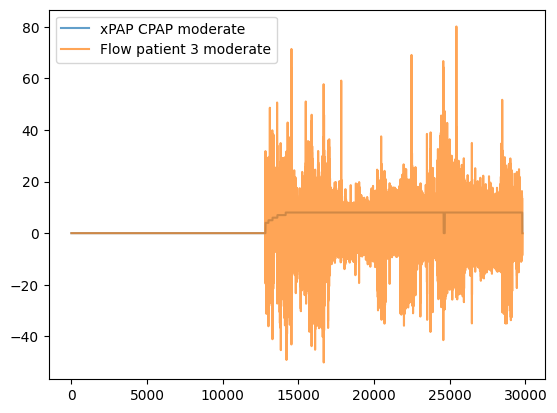

In [124]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 3')
ch1 = combined_signal(edf_files_moderate, index1)
ch2 = combined_signal(edf_files_moderate, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP moderate', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 3 moderate', alpha = 0.7)
plt.legend()
plt.show()

25200 252000
correlation coefficient is 0.0001624946999186597


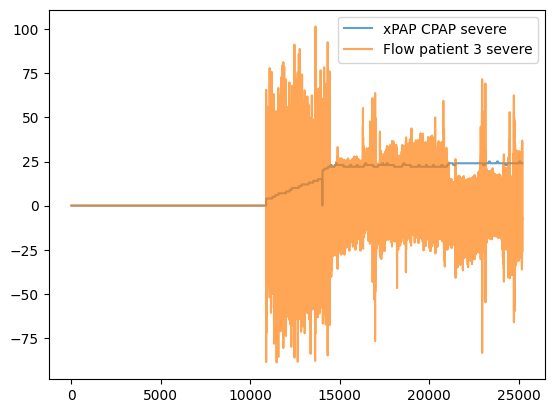

In [125]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('Flow patient 3')
ch1 = combined_signal(edf_files_severe, index1)
ch2 = combined_signal(edf_files_severe, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP severe', alpha = 0.7)
plt.plot(resampled_ch2, label='Flow patient 3 severe', alpha = 0.7)
plt.legend()
plt.show()

30968 30968


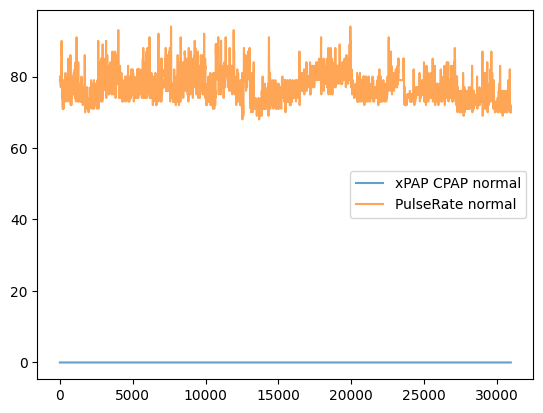

In [127]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('PulseRate')
ch1 = combined_signal(edf_files_normal, index1)
ch2 = combined_signal(edf_files_normal, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2[resampled_ch2 == 0] = 79

plt.plot(resampled_ch1, label='xPAP CPAP normal', alpha = 0.7)
plt.plot(resampled_ch2, label='PulseRate normal', alpha = 0.7)
plt.legend()
plt.show()

36511 36511
correlation coefficient is -0.12943374717525474


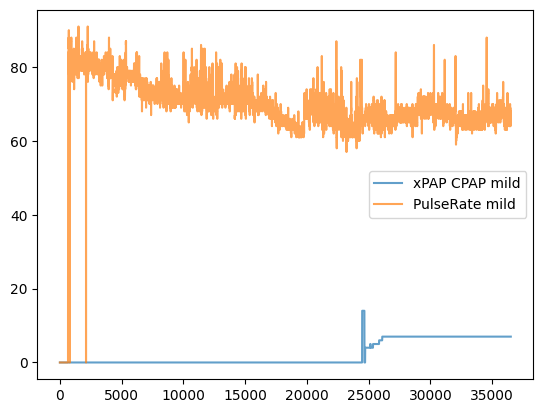

In [128]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('PulseRate')
ch1 = combined_signal(edf_files_mild, index1)
ch2 = combined_signal(edf_files_mild, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP mild', alpha = 0.7)
plt.plot(resampled_ch2, label='PulseRate mild', alpha = 0.7)
plt.legend()
plt.show()

29798 29798
correlation coefficient is -0.6547150639643642


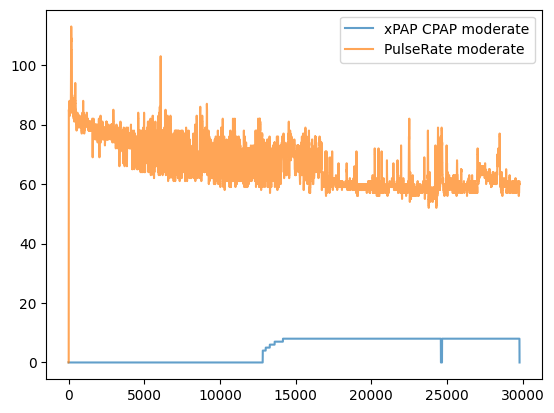

In [129]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('PulseRate')
ch1 = combined_signal(edf_files_moderate, index1)
ch2 = combined_signal(edf_files_moderate, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP moderate', alpha = 0.7)
plt.plot(resampled_ch2, label='PulseRate moderate', alpha = 0.7)
plt.legend()
plt.show()

25200 25200
correlation coefficient is -0.13146227246247594


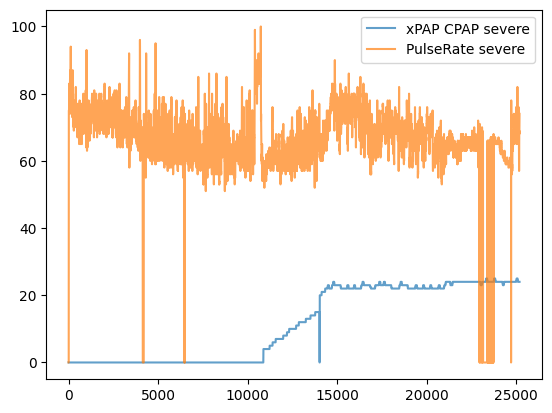

In [130]:
index1 = labels.index('xPAP CPAP')
index2 = labels.index('PulseRate')
ch1 = combined_signal(edf_files_severe, index1)
ch2 = combined_signal(edf_files_severe, index2)

print(ch1.shape[0], ch2.shape[0])

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

resampled_ch1 = resample_signal(ch1, min(ch1.shape[0], ch2.shape[0]))
resampled_ch2 = resample_signal(ch2, min(ch1.shape[0], ch2.shape[0]))

correlation_coefficient = np.corrcoef(resampled_ch1, resampled_ch2)[0, 1]
print(f"correlation coefficient is {correlation_coefficient}")

plt.plot(resampled_ch1, label='xPAP CPAP severe', alpha = 0.7)
plt.plot(resampled_ch2, label='PulseRate severe', alpha = 0.7)
plt.legend()
plt.show()